<a href="https://colab.research.google.com/github/ounospanas/AIDL_B02/blob/main/PyTorch_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PyTorch is similar to numpy and is more imperative (you do not define graph statically before a model can run) and dynamic: you can define, change and execute nodes as you go, no special session interfaces or placeholders.

In [ ]:
import torch

# Custom layer

In [ ]:
# sigmoid activation function
def activation(x):
    return 1/(1+torch.exp(-x))

In [ ]:
# define x_train
x_features = torch.randn((1, 10))
# random weights with same shape as features
weights = torch.randn_like(x_features)
# bias term
bias = torch.randn((1, 1))

In [ ]:
# linear layer
# .view is similar to reshape
a = activation(torch.mm(x_features, weights.view(10,1)) + bias)

# Dense Network

In [ ]:
from torchvision import datasets, transforms

# normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)), #(mean),(std) to execute (x-mean)/std
                              ])
# download and load the train FMNIST dataset
trainset = datasets.FashionMNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# download and load the test FMNIST data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100%|██████████| 26.4M/26.4M [00:03<00:00, 7.82MB/s]


Extracting /root/.pytorch/MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 210kB/s]


Extracting /root/.pytorch/MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.88MB/s]


Extracting /root/.pytorch/MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 8.10MB/s]


Extracting /root/.pytorch/MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/FashionMNIST/raw



100%|██████████| 26.4M/26.4M [00:01<00:00, 13.2MB/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 209kB/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 2.38MB/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 23.8MB/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



In [ ]:
from torch import nn
import torch.nn.functional as F

In [ ]:
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [ ]:
class DenseNetwork(nn.Module):
    def __init__(self):
        super().__init__() # mandatory to inherit the same nn.Module  architecture and provide useful methods and attributes

        # layers
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # pass the outputs of the previous layers to the next
        # here the sequence of the operations is defined NOT in __init__
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)

        return x

In [ ]:
# init network
model = DenseNetwork()
model

DenseNetwork(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
# get layer
model.fc1

Linear(in_features=784, out_features=256, bias=True)

In [ ]:
# get layer params
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-0.0313, -0.0056,  0.0339,  ..., -0.0010, -0.0037, -0.0250],
        [ 0.0134, -0.0135,  0.0073,  ...,  0.0027, -0.0026, -0.0223],
        [ 0.0298, -0.0291, -0.0016,  ...,  0.0195, -0.0262,  0.0257],
        ...,
        [-0.0071, -0.0210,  0.0057,  ...,  0.0139,  0.0124, -0.0006],
        [ 0.0189, -0.0268,  0.0070,  ...,  0.0170, -0.0089, -0.0042],
        [-0.0166, -0.0271,  0.0029,  ...,  0.0311,  0.0023, -0.0099]],
       requires_grad=True)
Parameter containing:
tensor([-0.0346,  0.0117,  0.0288, -0.0128, -0.0068,  0.0305, -0.0250,  0.0078,
         0.0295,  0.0094,  0.0028,  0.0323,  0.0183,  0.0030, -0.0119,  0.0170,
        -0.0310, -0.0312, -0.0053,  0.0311,  0.0125, -0.0180,  0.0283, -0.0072,
        -0.0348,  0.0107,  0.0201,  0.0008,  0.0075,  0.0338,  0.0089,  0.0135,
         0.0296, -0.0336,  0.0218,  0.0276,  0.0065, -0.0101,  0.0314, -0.0194,
        -0.0229, -0.0278,  0.0301,  0.0154, -0.0099, -0.0021, -0.0320,  0.0159,
         0.0091

In [ ]:
# Sequential network example
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [ ]:
# loss function
criterion = nn.NLLLoss()

# iter data
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
print(images.shape)

# one forward pass
logits = model(images)
print(logits[0])
# loss
loss = criterion(logits, labels)
print(loss)

loss.backward()
print(model[0].weight.grad)

torch.Size([64, 784])
tensor([-2.4117, -2.2472, -2.2092, -2.3188, -2.2870, -2.3024, -2.4907, -2.4538,
        -2.1454, -2.2162], grad_fn=<SelectBackward0>)
tensor(2.3127, grad_fn=<NllLossBackward0>)
tensor([[ 0.0010,  0.0010,  0.0010,  ...,  0.0010,  0.0010,  0.0010],
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        ...,
        [-0.0017, -0.0017, -0.0017,  ..., -0.0017, -0.0017, -0.0017],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [-0.0022, -0.0022, -0.0022,  ..., -0.0022, -0.0022, -0.0022]])


In [ ]:
from torch import optim

# optimizer MUST have the parameters as input and the lr
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [ ]:
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
model.to(device)
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 10
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # flatten images
        images = images.view(images.shape[0], -1).to(device)

        # training pass
        # backwards passes with the same parameters, the gradients are accumulated!!! So zero them
        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels.to(device))
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        print("Training loss {}".format(running_loss/len(trainloader)))

Training loss 1.5770802086096074
Training loss 0.7916779769763255
Training loss 0.6529216215427496
Training loss 0.5934974533408436
Training loss 0.5547961311808018
Training loss 0.5264973247419796
Training loss 0.5048465041527107
Training loss 0.4884200979079773
Training loss 0.47431878863113014
Training loss 0.46296621237927155


In [ ]:
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
model.to(device)
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 30

train_losses, test_losses = [], []
for e in range(epochs):
    tot_train_loss = 0
    for images, labels in trainloader:

        # flatten images
        images = images.view(images.shape[0], -1).to(device)

        # training pass
        # backwards passes with the same parameters, the gradients are accumulated!!! So zero them
        optimizer.zero_grad()

        log_ps = model(images)
        loss = criterion(log_ps, labels.to(device))
        tot_train_loss += loss.item()

        loss.backward()
        optimizer.step()
    else:
        tot_test_loss = 0
        test_correct = 0  # Number of correct predictions on the test set

        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                # flatten images
                images = images.view(images.shape[0], -1).to(device)
                labels = labels.to(device)

                log_ps = model(images)
                loss = criterion(log_ps, labels)
                tot_test_loss += loss.item()

                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                test_correct += equals.sum().item()

        # Get mean loss to enable comparison between train and test sets
        train_loss = tot_train_loss / len(trainloader.dataset)
        test_loss = tot_test_loss / len(testloader.dataset)

        # At completion of epoch
        train_losses.append(train_loss)
        test_losses.append(test_loss)

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_loss),
              "Test Loss: {:.3f}.. ".format(test_loss),
              "Test Accuracy: {:.3f}".format(test_correct / len(testloader.dataset)))

Epoch: 1/30..  Training Loss: 0.025..  Test Loss: 0.016..  Test Accuracy: 0.689
Epoch: 2/30..  Training Loss: 0.013..  Test Loss: 0.011..  Test Accuracy: 0.744
Epoch: 3/30..  Training Loss: 0.010..  Test Loss: 0.010..  Test Accuracy: 0.766
Epoch: 4/30..  Training Loss: 0.009..  Test Loss: 0.009..  Test Accuracy: 0.783
Epoch: 5/30..  Training Loss: 0.009..  Test Loss: 0.009..  Test Accuracy: 0.797
Epoch: 6/30..  Training Loss: 0.008..  Test Loss: 0.009..  Test Accuracy: 0.805
Epoch: 7/30..  Training Loss: 0.008..  Test Loss: 0.008..  Test Accuracy: 0.812
Epoch: 8/30..  Training Loss: 0.008..  Test Loss: 0.008..  Test Accuracy: 0.817
Epoch: 9/30..  Training Loss: 0.007..  Test Loss: 0.008..  Test Accuracy: 0.820
Epoch: 10/30..  Training Loss: 0.007..  Test Loss: 0.008..  Test Accuracy: 0.823
Epoch: 11/30..  Training Loss: 0.007..  Test Loss: 0.008..  Test Accuracy: 0.825
Epoch: 12/30..  Training Loss: 0.007..  Test Loss: 0.007..  Test Accuracy: 0.831
Epoch: 13/30..  Training Loss: 0.007.

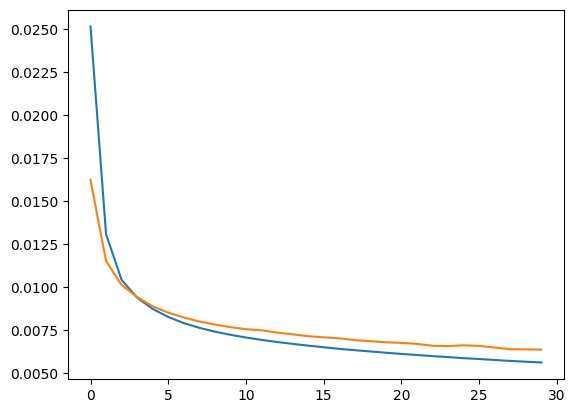

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')

# save and load model

In [ ]:
torch.save(model.state_dict(), 'checkpoint.pt')

In [ ]:
state_dict = torch.load('checkpoint.pt')
model.load_state_dict(state_dict)

<ipython-input-22-eb1f86a8ed74>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load('checkpoint.pt')


<All keys matched successfully>

# Inference

In [ ]:
# set the model in inference mode to not use some layers such as dropout
model.eval()

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
img = img.view(1, 784).to(device)

# compute class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

tensor(2)


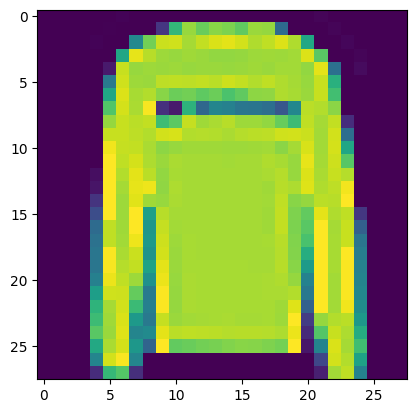

In [ ]:
print(labels[0])
plt.imshow(images[0][0])

In [ ]:
torch.argmax(ps)

tensor(2, device='cuda:0')

In [ ]:
ps.topk(1, dim=1)

torch.return_types.topk(
values=tensor([[0.7296]], device='cuda:0'),
indices=tensor([[2]], device='cuda:0'))

# CNN
https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
